In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('./pred.csv')
df

,NO,A,B,C,D,E
0,1,10.5,1,400.5,True,N
1,2,9.8,5,405.8,False,P
2,3,11.2,20,410.9,False,P
3,4,9.2,60,425.4,False,N
4,5,9.1,90,450.1,True,P
5,6,10.8,120,500.5,True,P
6,7,11.5,180,575.7,False,N
7,8,11.2,220,456.5,True,P
8,9,10.3,340,320.1,True,N
9,10,9.7,410,221.9,False,P


In [8]:
df.isna().sum()

NO    0
A     0
B     0
C     0
D     0
E     0
dtype: int64

In [9]:
X = np.array(df["A"]).reshape(-1,1)
X

array([[10.5],
       [ 9.8],
       [11.2],
       [ 9.2],
       [ 9.1],
       [10.8],
       [11.5],
       [11.2],
       [10.3],
       [ 9.7]])

In [11]:
y = np.array(df["B"])
y

array([  1,   5,  20,  60,  90, 120, 180, 220, 340, 410])

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(X)


model = LinearRegression()
model.fit(features,y)

y_pred = model.predict(features)
y_pred


array([171.59684671, 161.07128846, 140.10165599, 118.60429548,
       108.52498124, 163.24430566, 113.74022253, 140.10165599,
       172.87737588, 156.13737206])

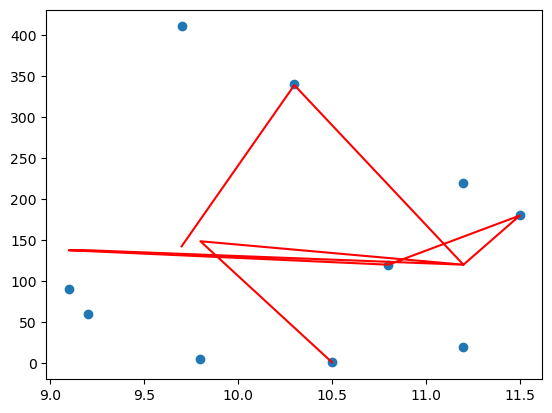

In [71]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X,y_pred, color="red")
plt.show()

In [72]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print('rmse: ', rmse)
print('r2: ', r2)
print('mae: ', mean_absolute_error(y, y_pred))
print('mse: ', mean_squared_error(y, y_pred))

rmse:  109.78350161571045
r2:  0.33754049662918606
mae:  73.82765556214197
mse:  12052.4172270067


In [31]:
to_predict = poly.fit_transform([[50]])

model.predict(to_predict)

array([8965146.91280712])